In [187]:
import pickle
import numpy as np
import pandas as pd
from pprint import pprint
from train import stringify
import seaborn as sns

In [160]:
with open('./cross_validation_decoder_input/train.pl', 'rb') as f:
    results = pickle.load(f)

In [161]:
results.keys()

dict_keys(['params', 'training_idx', 'test_idx', 'score_keys', 'metric_keys', 'metrics'])

In [162]:
params = [stringify(p) for p in results['params']]
params

['recurrent_dropout_0.9-cv_iter_0-regularizer_l2-dropout_0-di_True',
 'recurrent_dropout_0.9-cv_iter_0-dropout_0-di_True']

In [163]:
score_keys = np.array(results['score_keys'])
pprint(list(score_keys))

['link_categorical_accuracy',
 'link_f1',
 'link_loss',
 'loss',
 'type_categorical_accuracy',
 'type_f1',
 'type_loss',
 'val_link_categorical_accuracy',
 'val_link_f1',
 'val_link_loss',
 'val_loss',
 'val_type_categorical_accuracy',
 'val_type_f1',
 'val_type_loss']


In [164]:
list(zip(results['metric_keys'], np.array(results['metrics']).shape))

[('outer', 1), ('inner', 5), ('param', 2), ('score', 14), ('epoch', 4000)]

In [165]:
np.array(results['metrics']).shape

(1, 5, 2, 14, 4000)

In [166]:
metrics = np.array(results['metrics'])
metrics.shape

(1, 5, 2, 14, 4000)

In [167]:
len(score_keys)

14

In [168]:
[{k: v for k, v in d.items() if k != 'tboard'} for d in results['params']][:4]

[{'cv_iter': 0,
  'di': True,
  'dropout': 0,
  'recurrent_dropout': 0.9,
  'regularizer': 'l2'},
 {'cv_iter': 0, 'di': True, 'dropout': 0, 'recurrent_dropout': 0.9}]

#### Metrics

In [211]:
last_epoch_metrics = metrics[:,:,:,:,-1]
last_epoch_metrics = np.nanmax(metrics,-1)
mean_over_cv = last_epoch_metrics.mean(0).mean(0)

In [171]:
var_over_cv = last_epoch_metrics.mean(0).var(0)

In [170]:
pd.DataFrame(mean_over_cv, columns=score_keys, index=[stringify(p) for p in results['params']])

,link_categorical_accuracy,link_f1,link_loss,loss,type_categorical_accuracy,type_f1,type_loss,val_link_categorical_accuracy,val_link_f1,val_link_loss,val_loss,val_type_categorical_accuracy,val_type_f1,val_type_loss
recurrent_dropout_0.9-cv_iter_0-regularizer_l2-dropout_0-di_True,0.717165,0.723083,0.319818,0.335793,0.99356,0.835395,0.041290,0.449399,0.449106,1.095717,0.850763,0.898375,0.755386,0.294930
recurrent_dropout_0.9-cv_iter_0-dropout_0-di_True,0.865470,0.840780,0.000066,0.000036,1.00000,0.840780,0.000005,0.516090,0.426015,2.423000,1.731044,0.870851,0.732144,1.039088


In [212]:
pd.DataFrame(var_over_cv, columns=score_keys, index=[stringify(p) for p in results['params']])

,link_categorical_accuracy,link_f1,link_loss,loss,type_categorical_accuracy,type_f1,type_loss,val_link_categorical_accuracy,val_link_f1,val_link_loss,val_loss,val_type_categorical_accuracy,val_type_f1,val_type_loss
recurrent_dropout_0.9-cv_iter_0-regularizer_l2-dropout_0-di_True,0.000200,0.000166,7.056873e-04,2.881431e-04,6.834253e-06,0.000051,6.519525e-05,0.002496,0.002405,0.052232,0.018529,0.000146,0.000315,0.004185
recurrent_dropout_0.9-cv_iter_0-dropout_0-di_True,0.000205,0.000031,1.283436e-08,3.104845e-09,3.554421e-16,0.000031,8.465283e-12,0.003174,0.002332,0.217906,0.059891,0.000127,0.000742,0.034090


### Plots

In [62]:
results['score_keys']

['link_categorical_accuracy',
 'link_f1',
 'link_loss',
 'loss',
 'type_categorical_accuracy',
 'type_f1',
 'type_loss',
 'val_link_categorical_accuracy',
 'val_link_f1',
 'val_link_loss',
 'val_loss',
 'val_type_categorical_accuracy',
 'val_type_f1',
 'val_type_loss']

In [70]:
metrics.shape

(1, 5, 2, 14, 4000)

In [72]:
mean_over_cv.shape

(2, 14)

In [64]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
def plot_for_params(params=['val_type_categorical_accuracy', 'val_type_f1']):
    for i, (param, param_metric) in enumerate(zip(results['params'], mean_over_cv)):
        for score, line in zip(params, [':','-']):
            ind = list(score_keys).index(score)
            metric = metrics.mean(0).mean(0)[i,ind].T
            metric = np.convolve(metric, np.ones((50,))/50, mode='valid')
            pl, = plt.plot(metric,
                           label='\n'.join([stringify(param), score]), 
                           ls=line, 
                           c=pl.get_color() if line == '-' else None)

    plt.legend()

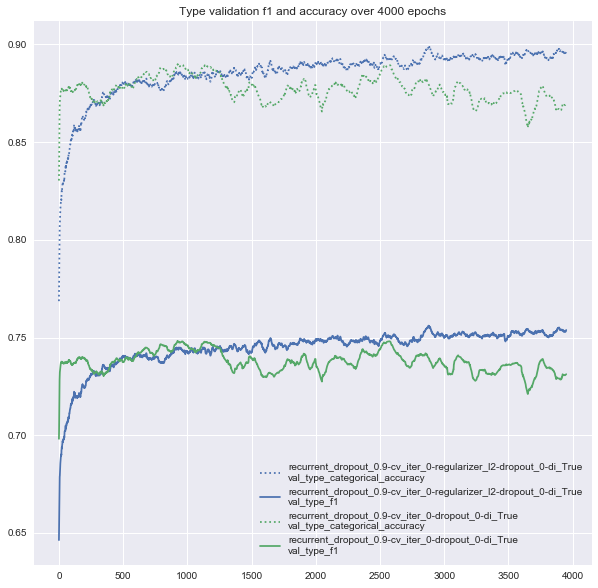

In [207]:
plt.figure(figsize=(10, 10))
plt.title('Type validation f1 and accuracy over 4000 epochs')
plot_for_params(['val_type_categorical_accuracy', 'val_type_f1'])

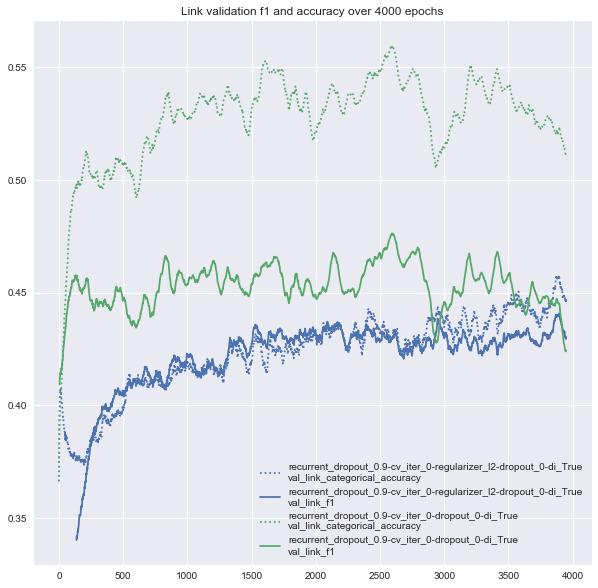

In [209]:
plt.figure(figsize=(10, 10))
plt.title('Link validation f1 and accuracy over 4000 epochs')
plot_for_params(['val_link_categorical_accuracy', 'val_link_f1'])